# SVM (Support Vector Machine)

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>C</code></td>
      <td>
        학습 데이터의 오류 허용도를 결정<br>
        C 값이 크면 오류를 최소화하고, 결정 경계가 데이터에 더 민감해짐 (마진을 최대화하는 대신 오류를 허용하지 않으므로 과대적합 가능성)<br>
        C 값이 작으면 오류를 허용하면서 일반화에 더 집중 (마진을 최대화하려고 노력하면서 오류를 어느 정도 허용하나 과소적합 가능성)
      </td>
    </tr>
    <tr>
      <td><code>kernel</code></td>
      <td>
        비선형 데이터의 변환을 위한 커널 함수 설정
        <ul>
          <li><code>linear</code>: 선형 커널 (데이터가 선형적으로 분리 가능한 경우)</li>
          <li><code>poly</code>: 다항식 커널 (비선형 관계, 차수 degree로 지정)</li>
          <li><code>rbf</code>: RBF(Radial Basis Function)커널, 가우시안 커널로 비선형 데이터 처리</li>
          <li><code>sigmoid</code>: 시그모이드 커널</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
iris_data.keys()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120,), (30,))

In [3]:
# 모델 학습 및 평가
from sklearn.svm import SVC

model = SVC(kernel='linear') # kernel의 default값이 rbf
model.fit(X_train, y_train)
model.score(X_test, y_test) #분류모델에서 스코어 계산은 정확도, 회귀는 r2 스코어

1.0

In [4]:
df = pd.DataFrame(iris_data.data[:,:2], columns=iris_data.feature_names[:2]) # 모든 행, 1번째 열까지 슬라이싱 -> 슬라이싱은 차원 유지
df['target']=iris_data.target
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [5]:
# 훈련 - 테스트 데이터 분리
X = iris_data.data[:,:2]
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [7]:
# 모델 학습 및 평가
svm_clf = SVC(kernel='linear', C=1.0)

svm_clf.fit(X_train, y_train)
svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

(0.8, 0.9)

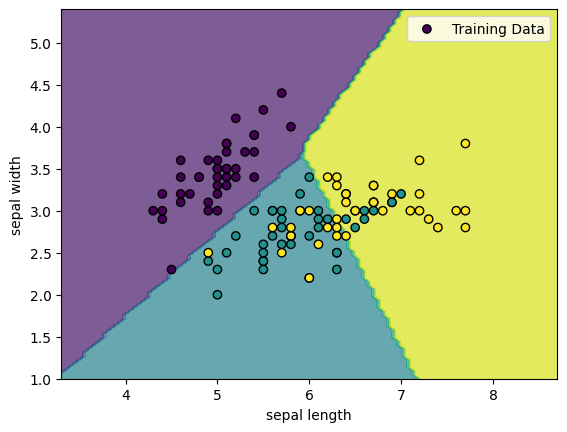

In [8]:
# 시각화
from sklearn.inspection import DecisionBoundaryDisplay

# 결정 경계
dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7)

# 훈련 데이터 산점도
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', label='Training Data') # 첫번째 특징, 두번째 특징으로 슬라이싱하기 x축, y축 순서

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

plt.show()

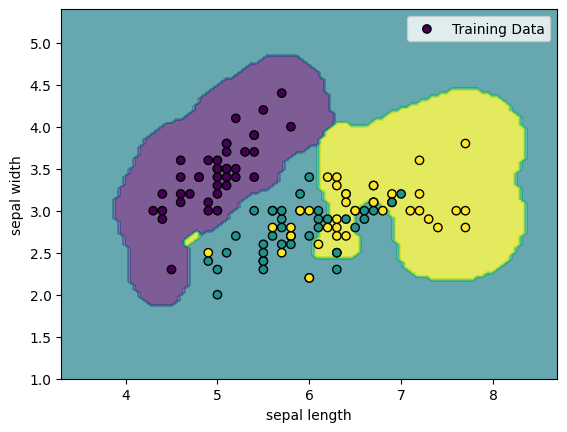

In [23]:
# RBF 커널 사용 시각화
svm_clf = SVC(kernel='rbf', C=1.0, gamma=10.5)

svm_clf.fit(X_train, y_train)
svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7)\

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', label='Training Data')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

plt.show()

# SVR (Support Vector Regressor)

| 특징                   | SVM                                    | SVR                                    |
|----------------------|---------------------------------------|---------------------------------------|
| **목적**              | 이진 분류 문제 해결                   | 연속적인 값 예측                      |
| **결정 경계**         | 서포트 벡터와의 거리를 최대화하여 생성 | 데이터 포인트와의 오차를 최소화하여 생성 |
| **마진/허용 오차**    | 마진을 최대화하여 일반화 성능 향상    | ε 매개변수로 허용 오차 범위 설정       |
| **결과**              | 클래스 예측 (이진 분류)               | 연속적인 값 예측                      |


**작동 원리**

1. **𝜖-튜브(엡실론 튜브)**
   - 데이터 포인트와 예측 값 사이의 허용 오차 범위를 정의
   - 𝜖(엡실론 튜브) : 값을 기준으로 오차가 범위 내에 있으면 무시, 범위를 벗어나면 벌칙(Penalty)을 부여

2. **최적화 목표**
   - 𝜖-튜브 내부에 데이터를 포함하면서, 오차를 최소화하고 마진(Margin)을 최대화

3. **커널 트릭**
   - 비선형 데이터를 고차원 공간으로 매핑하여 선형적으로 해결 가능

In [64]:
# 데이터 준비
np.random.seed(0)
X = np.sort(np.random.rand(40,1)*5, axis=0) 
y = np.sin(X).ravel() + np.random.rand(40)*0.1 # ravel: 1차원으로 만들어주는 함수 # np.random.randn(40)*0.1: 노이즈 추가 rand: 균등분포에서 난수 생성, randn: 표준 정규분포에서 난수 생성 (0-1사이)

X_test = np.linspace(0,5,100).reshape(-1,1) # 2차원으로

In [65]:
# 모델 학습 및 예측
from sklearn.svm import SVR # regressor

# linear, poly 커널 적용
svr_rbf = SVR(kernel='rbf')
svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

# 학습
svr_rbf.fit(X,y)
svr_linear.fit(X,y)
svr_poly.fit(X,y)

# 예측
pred_rbf = svr_rbf.predict(X_test)
pred_linear = svr_linear.predict(X_test)
pred_poly = svr_poly.predict(X_test)

0.1


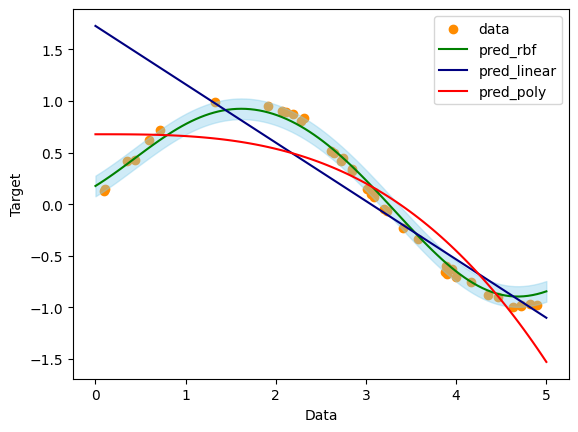

In [73]:
# 결과 시각화
plt.scatter(X, y, color='darkorange', label='data') # 훈련 데이터를 산점도로
plt.plot(X_test, pred_rbf, color='green', label='pred_rbf')
plt.plot(X_test, pred_linear, color='navy', label='pred_linear') # 예측한 내용
plt.plot(X_test, pred_poly, color='red', label='pred_poly')

# epsilon 오차 범위 시각화
svr_rbf_epsilon = svr_rbf.epsilon # epsilon default value: 0.1
print(svr_rbf_epsilon)
epsilon_upper = pred_rbf + svr_rbf_epsilon
epsilon_lower = pred_rbf - svr_rbf_epsilon
plt.fill_between(X_test.ravel(), epsilon_lower, epsilon_upper, color='skyblue', alpha=0.4) # ravel: X_test를 1차원으로 바꿔주기 

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()

##### 캘리포니아 주택 가격 예측

In [ ]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

In [ ]:
# 데이터 분리 및 스케일링

In [ ]:
# svr 모델 훈련 및 평가